In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [2]:
df  = pd.read_csv('two_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

study_hours           0
sleep_hours           0
attendance_percent    0
final_marks           0
stress_level          0
dtype: int64
['study_hours', 'sleep_hours', 'attendance_percent', 'final_marks', 'stress_level']


In [8]:
x = df[['study_hours', 'sleep_hours', 'attendance_percent']].values.reshape(-1,3)
y = df[['final_marks', 'stress_level']].values.reshape(-1,2)

xs = MinMaxScaler()
ys = MinMaxScaler()

x = xs.fit_transform(x)
y = ys.fit_transform(y)

jb.dump(xs, 'two_x_scaler.pkl')
jb.dump(ys, 'two_y_scaler.pkl')


['two_y_scaler.pkl']

In [11]:
def performance(study, sleep, attendance):
    inp = np.array([[study, sleep, attendance]], dtype='float')
    xs = jb.load('two_x_scaler.pkl')
    ys = jb.load('two_y_scaler.pkl')
    inp = xs.transform(inp)
    model_path = 'two.keras'
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=2)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        h = model.fit(x, y, epochs=200)
        model.save('two.keras')
        lv = h.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure(figsize=(12, 5))

        # Plot for final marks
        plt.subplot(1, 2, 1)
        plt.scatter(y[:, 0], pred[:, 0], color='blue', label='Marks')
        plt.plot([y[:, 0].min(), y[:, 0].max()], [y[:, 0].min(), y[:, 0].max()], 'k--')  # perfect line
        plt.xlabel('Actual Marks')
        plt.ylabel('Predicted Marks')
        plt.title('Actual vs Predicted Marks')
        plt.grid(True)
        plt.legend()

        # Plot for stress level
        plt.subplot(1, 2, 2)
        plt.scatter(y[:, 1], pred[:, 1], color='green', label='Stress Level')
        plt.plot([y[:, 1].min(), y[:, 1].max()], [y[:, 1].min(), y[:, 1].max()], 'k--')  # perfect line
        plt.xlabel('Actual Stress')
        plt.ylabel('Predicted Stress')
        plt.title('Actual vs Predicted Stress')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

    return ys.inverse_transform(model.predict(inp))[0]

Epoch 1/200


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5145
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4513
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4069
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3292
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2976
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2530
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2254
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1981
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1619
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1352 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1153
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1072 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0851
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0694
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0652 
Epoch 16/200
4/4 ━━━━━━━━━━━━━━

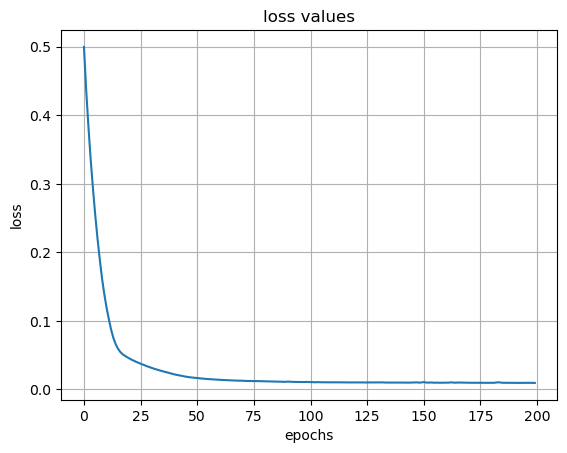

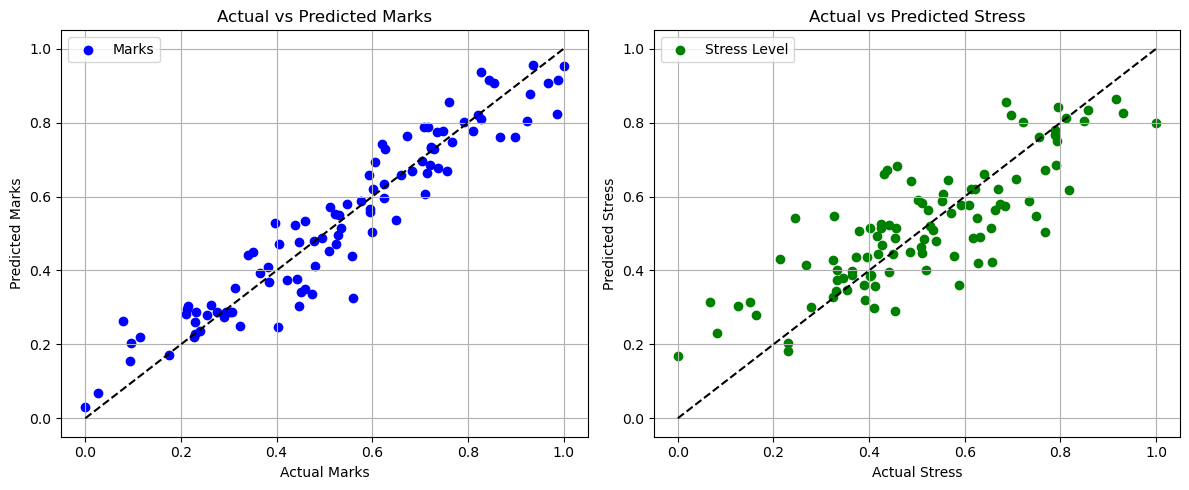

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Marks: 56.15, Predicted Stress Level: 46.24


In [13]:
result = performance(6.0, 7.5, 85.0)
print(f"Predicted Marks: {result[0]:.2f}, Predicted Stress Level: {result[1]:.2f}")
